In [108]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot
import glob
import os

## Get the Netflix data

In [251]:
files = glob.glob(os.path.join('', "data/*.csv"))
data = pd.concat({i.replace('data/','').replace('.csv','').capitalize(): pd.read_csv(i) for i in files}).reset_index()
del(data['level_1'])
data.columns = ['Person', 'Title', 'Date']
data['Date'] = pd.to_datetime(data['Date'])

### Data exploration

In [329]:
print ('{:=^40}'.format(' PERSONEN IN DE DATASET '))
print(*list(data.Person.unique()), sep='\n')

======== PERSONEN IN DE DATASET ========
Celeste
Daan
Moussa
Paul
Roy


In [253]:
data.shape

(6495, 3)

In [254]:
"Data loopt van {} t/m {}".format(data.Date.min().date(), data.Date.max().date())

'Data loopt van 2014-01-07 t/m 2018-12-08'

In [306]:
data.tail()

,Person,Title,Date,is_serie,production_title
6490,Roy,Top Gear: Seizoen 17: Aflevering 4,2015-10-27,True,Top Gear
6491,Roy,Family Guy: Seizoen 12: A Fistful of Meg,2015-10-27,True,Family Guy
6492,Roy,Family Guy: Seizoen 12: Quagmire's Quagmire,2015-10-27,True,Family Guy
6493,Roy,Top Gear: Seizoen 17: Aflevering 3,2015-10-27,True,Top Gear
6494,Roy,Family Guy: Seizoen 11: Turban Cowboy,2015-10-26,True,Family Guy


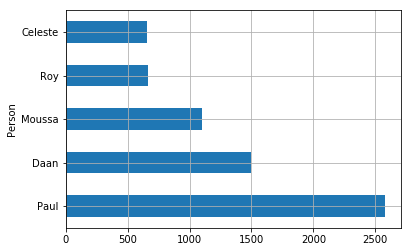

In [255]:
data.groupby('Person')['Title'].count().sort_values(ascending=False).plot('barh',grid=True)

In [345]:
# Is the title part of a serie or movie; if serie: What is the title of the show?

def get_serie_title(row, term):
    return row["Title"][:(row["Title"].find(term) - 2)]

def check_if_serie(row):
    is_serie = False
    production_title = row["Title"]
    
    serie_indicators = ['Season', 'Seizoen', 'Deel', 'Aflevering', 'Hoofdstuk']
    
    for i in serie_indicators:
        if row["Title"].find(i) != -1:
            production_title = get_serie_title(row, i)
            is_serie = True
            break
    
    return pd.Series({'is_serie':is_serie, 'production_title':production_title})


data[['is_serie', 'production_title']] = data.apply(lambda row: check_if_serie(row), axis=1)

(-1.0513699165275434,
 1.1617502478932011,
 -1.3090087370190966,
 1.1099527970009093)

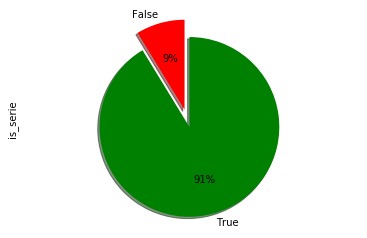

In [346]:
data.groupby(['is_serie'])['is_serie'].count().plot('pie', autopct='%1.0f%%', colors=['red', 'green'], explode=(0, 0.2),shadow=True, startangle=90).axis('equal')

In [352]:
data.head()

,Person,Title,Date,is_serie,production_title
0,Celeste,Explained: Season 1: Can We Live Forever?,2018-08-17,True,Explained
1,Celeste,Explained: Season 1: Monogamy,2018-08-17,True,Explained
2,Celeste,Explained: Season 1: K-Pop,2018-08-17,True,Explained
3,Celeste,Explained: Season 1: Cryptocurrency,2018-08-17,True,Explained
4,Celeste,Comedians in Cars Getting Coffee: New 2018: Fr...,2018-08-17,False,Comedians in Cars Getting Coffee: New 2018: Fr...


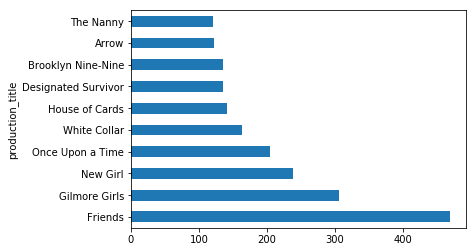

In [385]:
data.groupby("production_title")['Date'].count().sort_values(ascending=False).head(10).plot('barH')

In [374]:
# Unique production titles
len(data["production_title"].unique())

703